# TD1 : Jeux de données, classification, corrélation, clustering

In [1]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

Load data and transpose

In [2]:
cl_file = Path("cost-of-living.csv")
df_cl = pd.read_csv(cl_file, index_col=0)
df_cl.head()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
"Meal for 2 People, Mid-range Restaurant, Three-course",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,23.86,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,4.25,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,1.43,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,2.39,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [3]:
# Tranpose attr to cols
df_cl = df_cl.T
df_cl.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


In [4]:
# Overview
df_cl.describe()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,7.967187,35.768625,5.634250,3.257625,3.702938,1.261187,0.935125,0.998938,1.197875,1.902812,...,0.995187,2.391625,1.583188,1.809750,1.355937,1.076562,9.599437,20497.003687,447.470187,8039.567875
std,4.474586,18.878654,2.036808,2.140890,1.949165,0.723930,0.627407,0.391720,0.760670,0.752520,...,0.484362,0.994821,0.964584,1.080635,0.481411,0.648750,4.964241,6037.691697,421.356658,5972.758905
min,1.490000,7.590000,2.670000,0.780000,1.200000,0.290000,0.140000,0.390000,0.100000,0.750000,...,0.200000,0.670000,0.520000,0.350000,0.480000,0.250000,4.150000,11163.690000,37.060000,788.020000
25%,4.647500,20.925000,4.110000,1.665000,2.200000,0.647500,0.385000,0.710000,0.555000,1.377500,...,0.610000,1.537500,0.930000,1.050000,1.057500,0.547500,6.747500,17439.037500,176.375000,3666.565000
50%,6.285000,30.555000,5.095000,2.365000,3.080000,1.140000,0.810000,0.895000,1.020000,1.850000,...,0.910000,2.145000,1.225000,1.495000,1.250000,0.920000,8.690000,18868.595000,281.015000,6460.615000
75%,11.472500,49.637500,7.000000,4.812500,4.845000,1.750000,1.375000,1.170000,1.690000,2.352500,...,1.270000,3.132500,1.905000,2.455000,1.662500,1.420000,11.195000,21409.800000,572.902500,10511.532500
max,23.120000,109.160000,12.970000,11.130000,11.130000,3.870000,3.210000,2.640000,3.330000,5.330000,...,2.580000,5.210000,5.700000,5.760000,3.500000,3.400000,46.090000,67345.100000,2194.640000,34441.930000


In [5]:
# get attr and data points names
attr = df_cl.columns.to_list()
obs = df_cl.index.to_list()
print(f"First 10 attributes :\n{attr[0:10]}\n")
print(f"First 10 data points :\n{obs[0:10]}")

First 10 attributes :
['Meal, Inexpensive Restaurant', 'Meal for 2 People, Mid-range Restaurant, Three-course', 'McMeal at McDonalds (or Equivalent Combo Meal)', 'Domestic Beer (0.5 liter draught)', 'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)', 'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)', 'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)']

First 10 data points :
['Saint Petersburg, Russia', 'Istanbul, Turkey', 'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova', 'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina', 'Baku, Azerbaijan', 'Guadalajara, Mexico']


In [11]:
df_cl.index.name = "cities"
df_cl.index

Index(['Saint Petersburg, Russia', 'Istanbul, Turkey', 'Izmir, Turkey',
       'Helsinki, Finland', 'Chisinau, Moldova', 'Milan, Italy',
       'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina',
       'Baku, Azerbaijan', 'Guadalajara, Mexico',
       ...
       'Lviv, Ukraine', 'Novosibirsk, Russia', 'Bursa, Turkey',
       'Brussels, Belgium', 'Jerusalem, Israel', 'Melbourne, Australia',
       'Perth, Australia', 'Sydney, Australia', 'Alexandria, Egypt',
       'Quito, Ecuador'],
      dtype='object', name='cities', length=160)

## Question 1 : Les attributs concernant les coûts de location ou d'achat d'un logement sont-ils corrélés ?

In [12]:
# Get appartment related attr
apt_attr = [att for att in attr if re.search("[Aa]part", att)]

df_apt = df_cl[apt_attr]
df_apt.head()

,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre
cities,,,,,,,
"Saint Petersburg, Russia",524.45,344.27,1012.53,615.19,102.17,2476.05,1507.70
"Istanbul, Turkey",291.55,177.72,545.50,314.98,59.33,1315.18,657.05
"Izmir, Turkey",212.22,128.36,353.76,225.34,51.07,856.54,508.14
"Helsinki, Finland",986.93,758.13,1819.32,1271.16,82.66,7444.54,4099.36
"Chisinau, Moldova",244.49,177.96,428.67,330.84,113.46,904.82,589.13


Example of highly correlated features

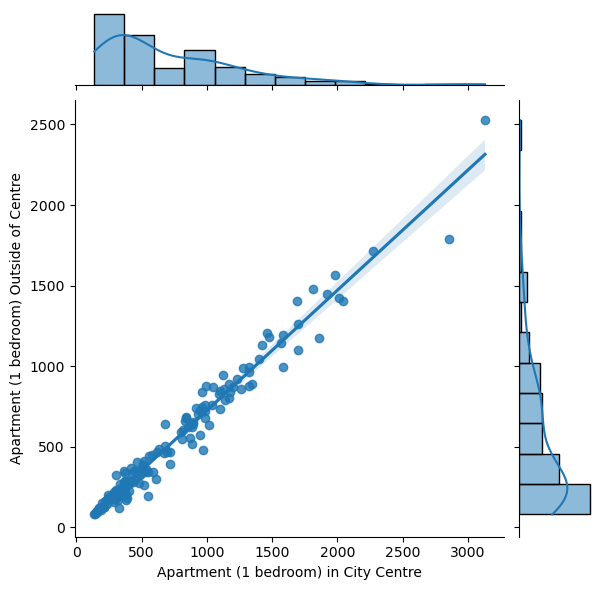

In [17]:
# Plot correlations
sns.jointplot(data=df_apt, x=apt_attr[0], y=apt_attr[1], kind="reg")

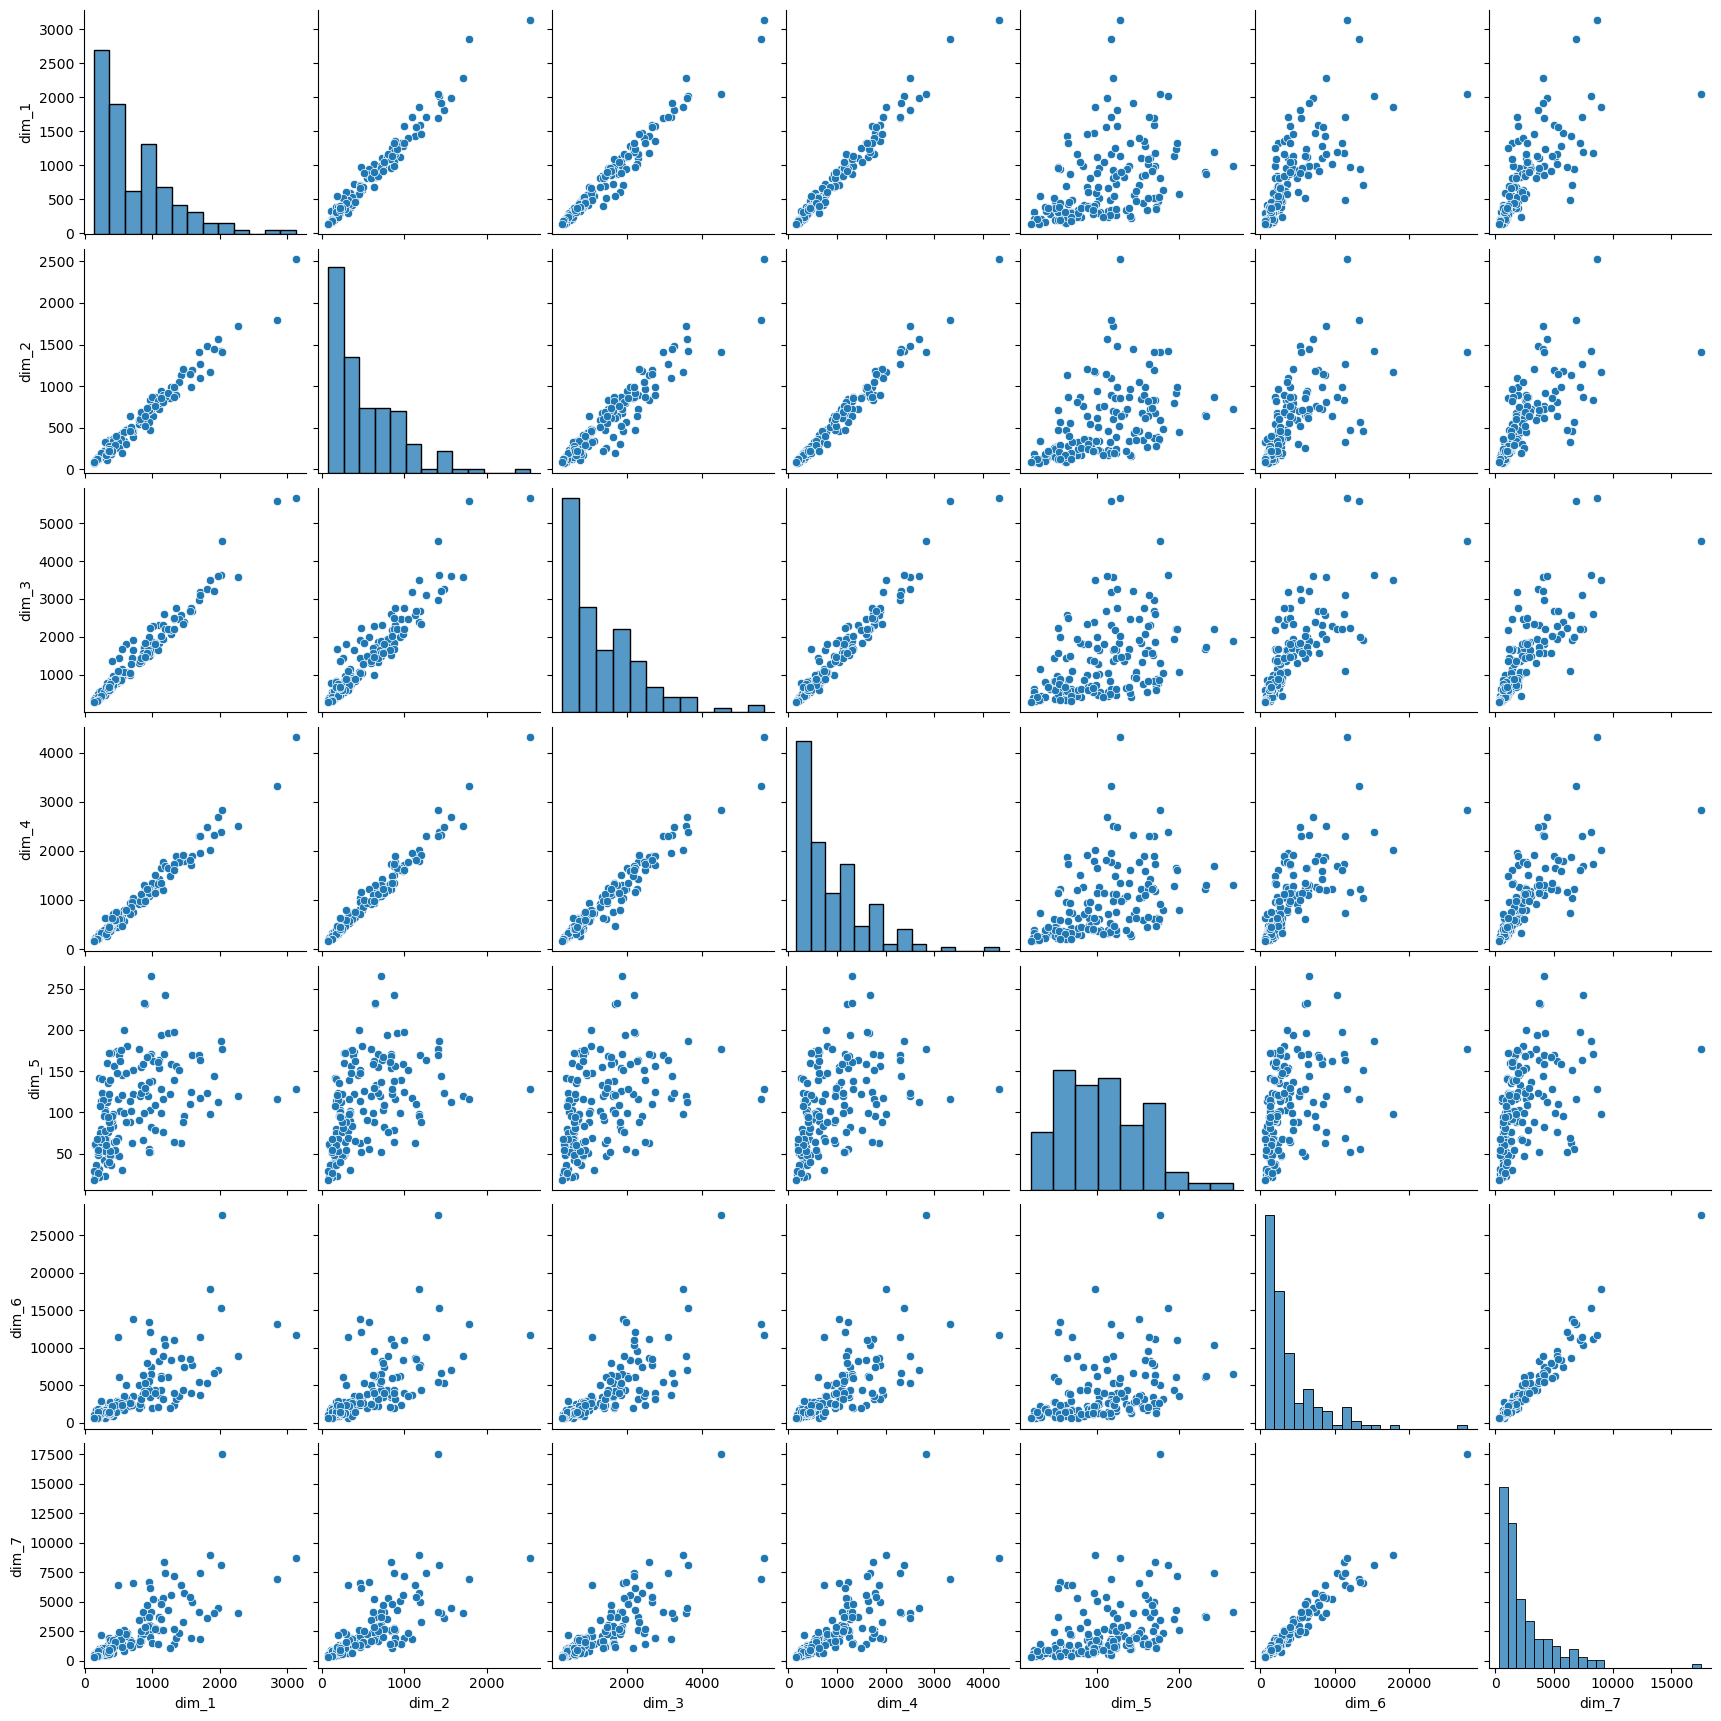

In [58]:
# Compare all vars
apt_attr_dims = [f"dim_{i}" for i in range(1, len(apt_attr)+1)]

g = sns.pairplot(data=df_apt.set_axis(apt_attr_dims, axis=1))

# for i, ax in enumerate(g.axes.flat):
#     ax.set_ylabel(f"feat_{int(i/apt_attr_num+1)}")
#     ax.set_xlabel(i)
# plt.show()


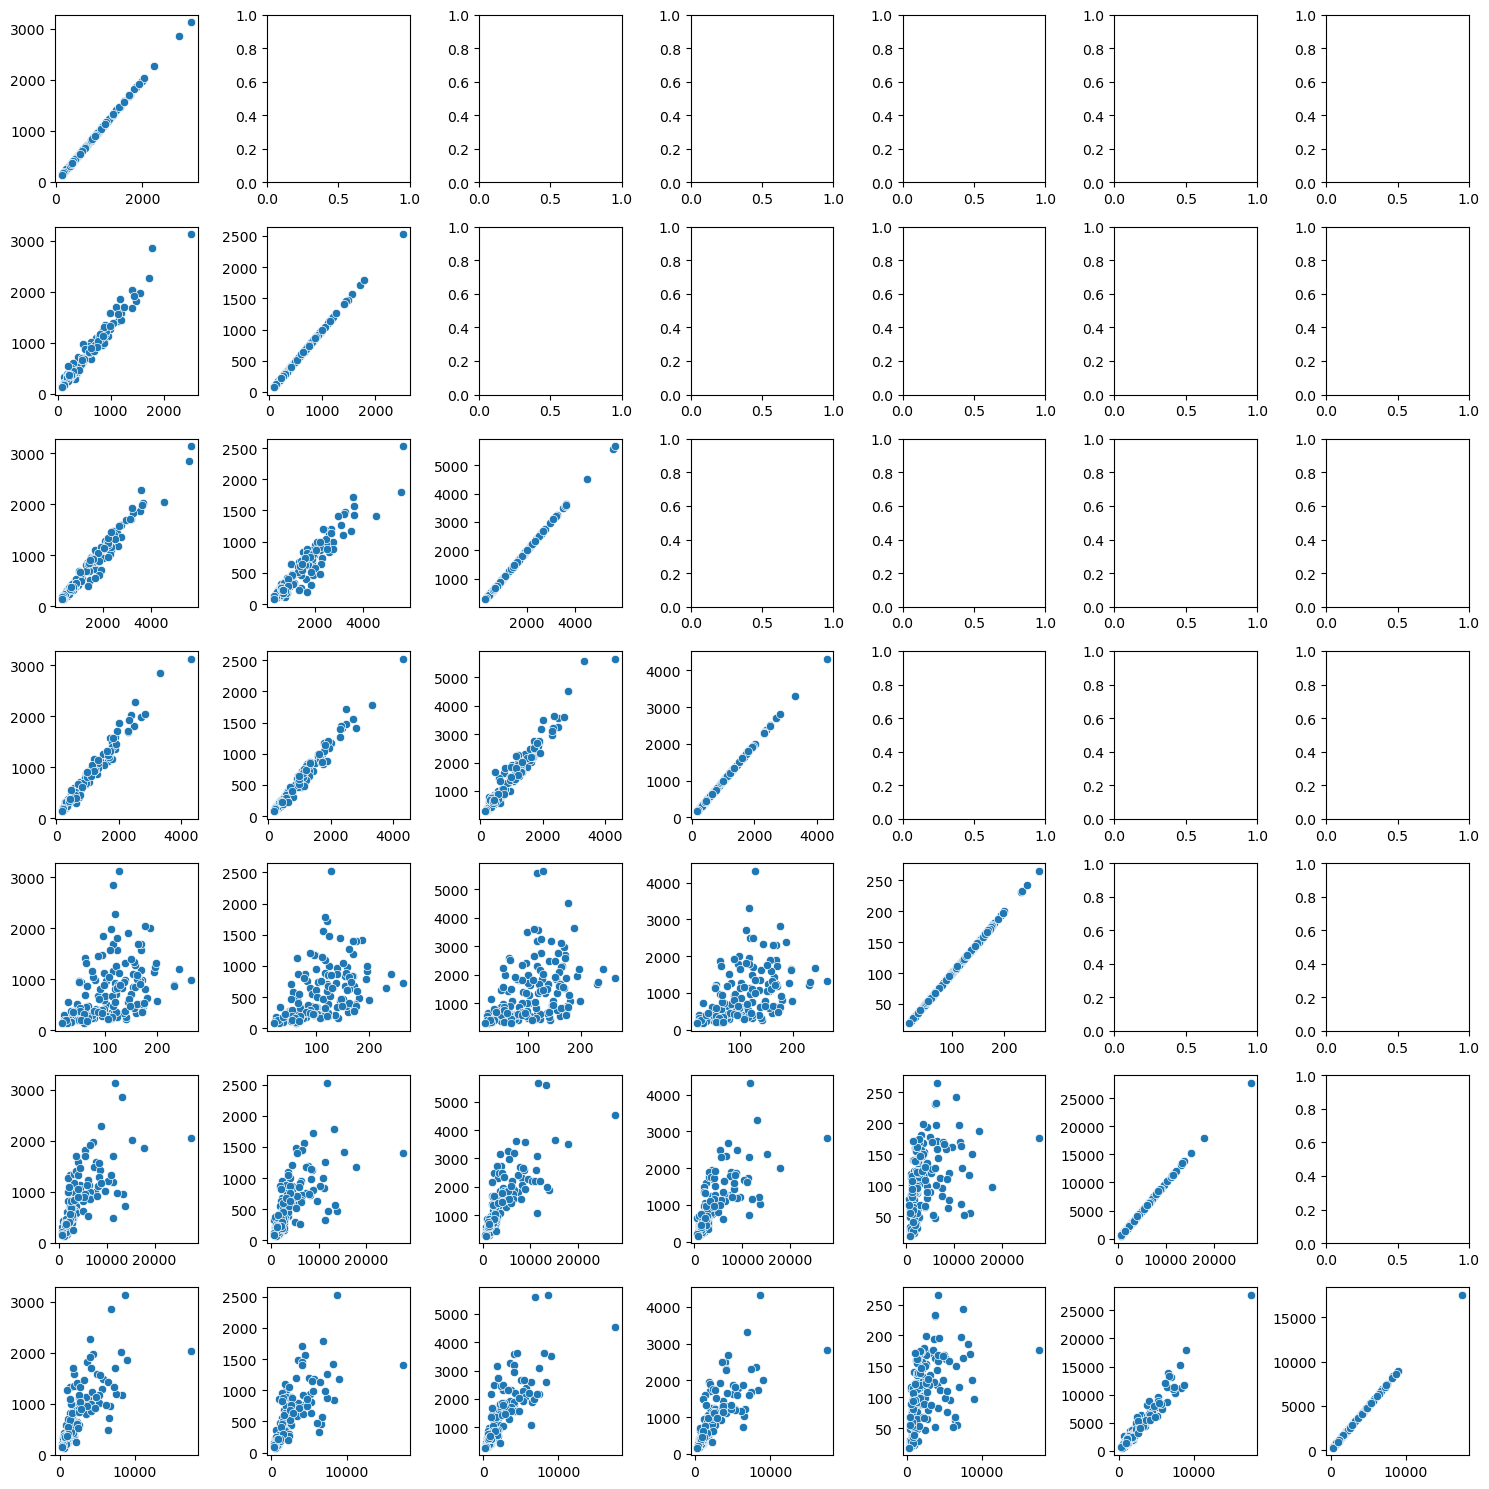

In [65]:
fig, axes = plt.subplots(7, 7,figsize=(15,15))
k = 0
for i in range(len(apt_attr)):
    for j in range(len(apt_attr)):
        if(i >= j):
            sns.scatterplot(x=apt_attr[i], y=apt_attr[j], data=df_apt, ax=axes[int(k/7),k%7])
            axes[int(k/7),k%7].set_title('')
            axes[int(k/7),k%7].set_xlabel("")
            axes[int(k/7),k%7].set_ylabel("")
        k += 1
fig.tight_layout()

In [68]:
df_apt.corr()

,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre
Apartment (1 bedroom) in City Centre,1.000000,0.985038,0.981850,0.986494,0.433947,0.720902,0.742220
Apartment (1 bedroom) Outside of Centre,0.985038,1.000000,0.948160,0.987023,0.456523,0.673747,0.719674
Apartment (3 bedrooms) in City Centre,0.981850,0.948160,1.000000,0.975950,0.407968,0.774545,0.780206
Apartment (3 bedrooms) Outside of Centre,0.986494,0.987023,0.975950,1.000000,0.444807,0.721992,0.759848
"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",0.433947,0.456523,0.407968,0.444807,1.000000,0.373824,0.428310
Price per Square Meter to Buy Apartment in City Centre,0.720902,0.673747,0.774545,0.721992,0.373824,1.000000,0.974075
Price per Square Meter to Buy Apartment Outside of Centre,0.742220,0.719674,0.780206,0.759848,0.428310,0.974075,1.000000


- Rentals features (dim1 to 4) all correlated strongly (>0.94)
- Price features (dim 6-7) are correlated (0.97)
- Basic service independent from "Rentals" and "Price" types features

Question 2 : Quelles sont les villes ayant des coûts de vie similaires ?